# <center>Shaft with circular cross-section <center>

Circle equation is $ x^2+y^2=r^2 $ So, prandtl stress function is given by $ \psi=K(r^2-x^2-y^2) $

In [23]:
import sympy as sym
from IPython.display import Math


In [37]:
x,y,r,R,K=sym.symbols('x,y,r,R,K')
psi=sym.Function('psi')(x,y)

In [41]:
boundary=(R**2-(x**2+y**2))
psi=K*boundary
display(Math(r'\psi={}'.format(sym.latex(psi))))

<IPython.core.display.Math object>

Now, we will solve for K  by knowing that $ del^2(\psi)=-1 $

In [44]:
lhs=sym.diff(psi,x,2)+sym.diff(psi,y,2)
rhs=-1
eq=sym.Eq(lhs,rhs)
eq
sol=sym.solve(eq,K)
K_value=sol[0]
display(Math(r'K={}'.format(sym.latex(K_value))))

<IPython.core.display.Math object>

In [52]:
boundary_exp=(boundary.subs(R,5))
psi_expression=K_value*boundary_exp  #for radius=5
display(Math(r'\psi={}'.format(sym.latex(psi_expression))))

<IPython.core.display.Math object>

In [53]:
#Now, we have to plot the contours. so we will use lamdify function

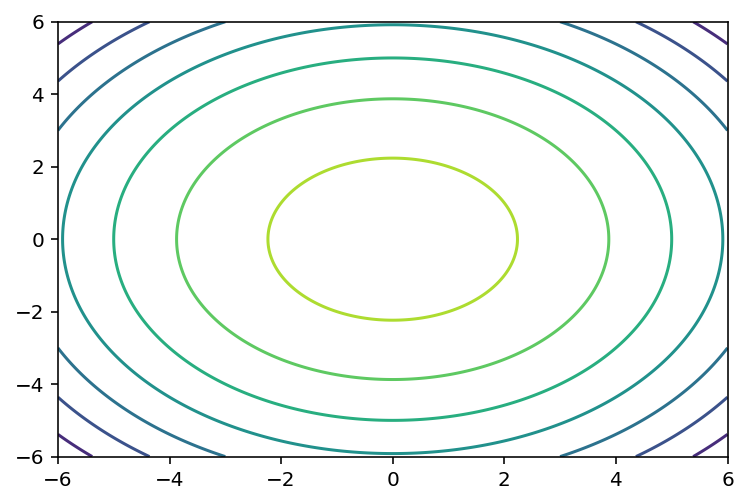

In [54]:
psi_lamb=sym.lambdify((x,y),psi_expression)
import numpy as np
xdata = np.linspace(-1.2*5,1.2*5,1000)
ydata = np.linspace(-1.2*5,1.2*5,1000)

X,Y = np.meshgrid(xdata,ydata)
%config InlineBackend.figure_format = "retina"
%matplotlib inline
import matplotlib.pyplot as plt
plt.contour(X,Y,psi_lamb(X,Y))

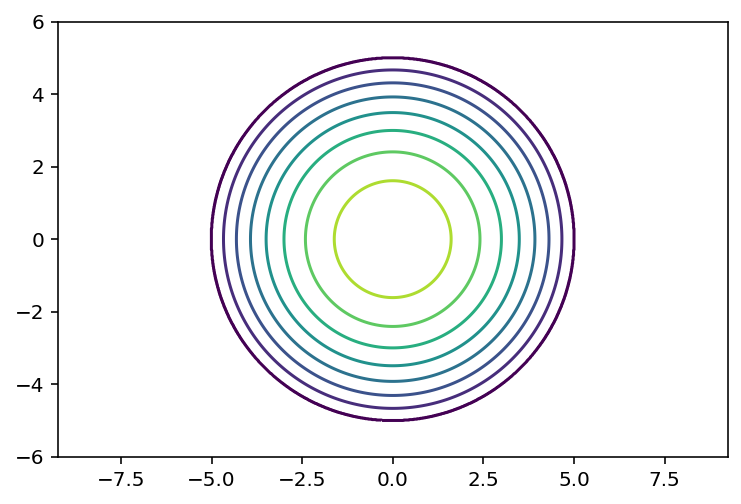

In [56]:
boundary_lamb = sym.lambdify((x,y),boundary_exp)

plt.contour(X,Y,psi_lamb(X,Y)*(boundary_lamb(X,Y)>0))
plt.axis('equal');

Now,we will find the torsional rigidity of the beam of circular c/s
For a simply connected region ,Torsional rigidity is given by $ GJ=4G $$\int$$_{A} \psi dA$$ $

In [61]:
J=4*K_value*sym.integrate((R**2-r**2)*2*sym.pi*r,(r,0,R))
display(Math(r'J={}'.format(sym.latex(J))))

<IPython.core.display.Math object>